# Data Visualization for Nanopublication Datasets Version 1

## Loading Data and Retrieve All the Nanopublications From the Dataset

In [1]:
import re

data = ["wikipathways_20180110.nq", "wikipathways_20180210.nq", "wikipathways_20180310.nq"]

nanopub_uris = []

def load_text(txtfile):
    with open(txtfile) as file:
        read_data = file.read()
    return read_data

def get_nanopub_uris(raw_text, version):
    uris = dict()
    nanopubs = raw_text.split()
    elements = re.findall('<.*?>', raw_text)
    for i in range(len(elements)):
        if "<http://www.nanopub.org/nschema#Nanopublication>" in elements[i]:
            if elements[i - 2] in uris:
                continue
            else:
                uris[elements[i - 2]] = version
    return uris

def get_full_intersection(nanopub_sets):
    for i in range(len(nanopub_sets)):
        nanopub_sets[i] = set(nanopub_sets[i].keys())
    intersection = set.intersection(*nanopub_sets)
    return intersection

def get_intersection(set1, set2):
    inter = set(set1.intersection(set2))
    return inter

for i in range(len(data)):
    raw_text = load_text(data[i])
    result = get_nanopub_uris(raw_text, i + 1)
    nanopub_uris.append(result)
    print("version", i + 1, len(result))

inter = get_intersection(set(nanopub_uris[0].keys()), set(nanopub_uris[1].keys()))
print(len(inter))

full_inter = get_full_intersection(nanopub_uris)
print("Full intersection", len(full_inter))

print(len(set(inter.intersection(full_inter))))

version 1 17097
version 2 17141
version 3 17147
14655
Full intersection 14248
14248


In [3]:
print(nanopub_uris[0])

{'<http://purl.org/np/RAszGAqZI98zx2ipT-HjtKmXUdO9N7Yiv5tNjWH32H2_Y>', '<http://purl.org/np/RApE2Av1uhNJhmvufOvZZbpcS85RDfFTeCH5jNhJBjxqE>', '<http://purl.org/np/RAD1VClr-PNXoKlpS1wla2QEj7allO-bkHShnxYVmrCBE>', '<http://purl.org/np/RATEfvr0UpihLdlmEYwWIcghLkgjPxRvNf2wxUbP-8QoU>', '<http://purl.org/np/RAk1H6TuOV_vEK-t8AyoGz1Xuij7TVPnTni3CwPWB_qDU>', '<http://purl.org/np/RAfqddTZEsCjffl-eglTtWhS72wA36oezdaljJsNdUFdU>', '<http://purl.org/np/RABy9aN9eu5doC7d-KxqrOlplsApbCUVi47HJFBMyESpw>', '<http://purl.org/np/RAEX790kDg_uk0tBSHkg4B9G00NuQwdNlMzck_WwV3n0g>', '<http://purl.org/np/RA3VFx3szcbon3C3XkIFeSe5cib2Hgj67BOXsdOy-TSMI>', '<http://purl.org/np/RAzI3CsLd4VRKYhs8pAMrEd5JiqK4OlK7nsYULhD_HJEQ>', '<http://purl.org/np/RAnrd7d0QvC2hssev7zIcULubM_tUD3p6THSpQVl8wAjc>', '<http://purl.org/np/RAGZGvpVVSPkRkd1Lk3ce-IgYEfpjW1qv9Efm9mzYfLcg>', '<http://purl.org/np/RAKmhPmFj9g439UekNeSE0ctOQCaWaHzMGuXsldjHxI8w>', '<http://purl.org/np/RAWy-Yq9ACRYs6JDM0il9hZ_tGFGHO6DKnc2FrfWTRI1Q>', '<http://purl.org/n

## Comparing Different Versions of a Dataset

Run below code to find the overlap between the two different versions of the dataset.

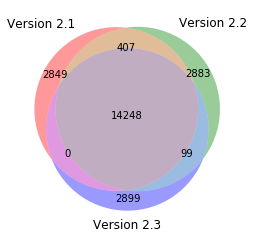

In [4]:
# library
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3

# from sys import exit

# v = venn2([version1, version2], set_labels = ('Version 2.0', 'Version 2.1'))
venn3(subsets = (17097 - 14248, 17131 - 14248, 14655 - 14248 , 17147 - 14248,0 , 14347 - 14248,14248), set_labels = ('Version 2.1', 'Version 2.2', 'Version 2.3'))
#(17097 - 14248, 17131 - 14248, 14248 , 6,9,4,2)

plt.show()

(1) Can you easily find out the number of nanopublication is contained in version 2.1; (2) Howmany are also in version 2.0?

In [5]:
qa = [
    ('What is the number of nanopublication is contained in version 2.1', len(version2)),
    ('Howmany of these nanopbulications are also contained in version 2.0?', 80),
     ]
for i in range(len(qa)):
    answer = input(qa[i][0])
    if int(answer) == (qa[i][1]):
        print("you're correct")
    else:
        print("The correct answer was %i" %qa[i][1])

NameError: name 'version2' is not defined

## Index Nanopublications (Subsets)

In nanopublication datasets, a large nanopublication set can be referred to by other nanopublication sets. Below visualization shows such occurence. A large nanopublication set is pointed by a few of its subsets.

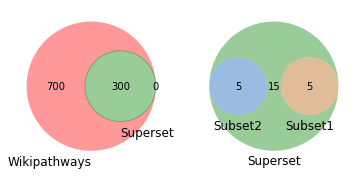

In [6]:
from matplotlib_venn import venn2, venn2_circles, venn3, venn3_circles
wikipathways = set(range(1,1001))
superset = set(range(200,500))

figure, axes = plt.subplots(1, 2)
v = venn2([wikipathways, superset], set_labels = ('Wikipathways', 'Superset'), ax=axes[0])
v.get_patch_by_id('11').set_color('green')
venn3(subsets=(0, 15, 5, 0, 0, 5, 0), set_labels = ('Subset1', 'Superset', 'Subset2'), ax=axes[1])

plt.show()

# Data Visualization for Nanopublication Datasets Version 2


## Comparing Different Versions of a Dataset

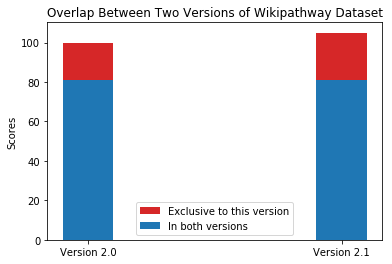

In [1]:
# a stacked bar plot with errorbars
import numpy as np
import matplotlib.pyplot as plt

N = 2
menMeans = (100, 105)
womenMeans = (81, 81)
ind = np.arange(N)    # the x locations for the groups
width = 0.20       

p1 = plt.bar(ind, menMeans, width, color='#d62728')
p2 = plt.bar(ind, womenMeans, width,)

plt.ylabel('Scores')
plt.title('Overlap Between Two Versions of Wikipathway Dataset')
plt.xticks(ind, ('Version 2.0', 'Version 2.1'))
plt.legend((p1[0], p2[0]), ('Exclusive to this version', 'In both versions'))

plt.show()

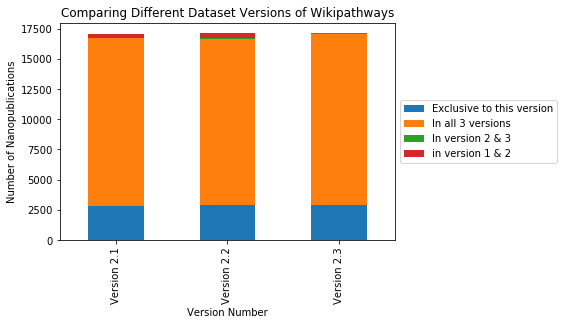

In [2]:
import pandas as pd
data1 = [13841,13742,14149]
data2 = [407,407, 0]
data3 = [0,99,99]
data4 = [2849,2883,2899]

df=pd.DataFrame({'In all 3 versions':data1, 'in version 1 & 2':data2, 'In version 2 & 3':data3, 'Exclusive to this version':data4})
ax = df.plot(kind='bar', stacked=True, title='Comparing Different Dataset Versions of Wikipathways')
ax.set(xlabel="Version Number", ylabel="Number of Nanopublications")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Version 2.1'
labels[1] = 'Version 2.2'
labels[2] = 'Version 2.3'

ax.set_xticklabels(labels)
plt.show()